# 2021 타자 성적 예측해보기

<strong>2012~2020 타자 성적 데이터로 2021 성적을 예측해본다.</strong>
<br>1. 100타석 이상 섰던 선수
<br>2. SK 선수 기준
<br>3. WAR을 value 값으로 설정
<br>4. 예측에 사용되는 column 은 타율, OPS -> 변수중요도 확인해보기

## 1. 데이터 불러오기 
2012~2020 정규시즌, 100타석 이상 SK 선수를 기준으로 분석

In [2]:
import pandas as pd

In [3]:
raw = pd.read_csv('./KBO_2020_Batter.csv')

In [4]:
raw.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,로맥,SK,139,586,485,137,32,85,91,91,116,4,0.308,0.282,0.399,0.546,0.945,0.407,4.94
1,최정,SK,133,553,452,122,33,90,96,75,98,8,0.272,0.270,0.392,0.538,0.930,0.403,5.57
2,최지훈,SK,127,520,466,120,1,66,27,38,80,18,0.307,0.258,0.318,0.326,0.644,0.299,-0.63
3,김성현,SK,133,392,343,93,2,34,25,30,27,1,0.287,0.271,0.336,0.321,0.657,0.306,0.49
4,김강민,SK,122,327,289,73,12,39,45,27,62,7,0.281,0.253,0.323,0.422,0.745,0.327,0.62


In [5]:
sk_20 = raw[raw['팀명'] == 'SK']

In [53]:
sk_19 = pd.read_csv('./KBO_2019_Batter.csv')
sk_18 = pd.read_csv('./KBO_2018_Batter.csv')
sk_17 = pd.read_csv('./SK_2017_Batter.csv')
sk_16 = pd.read_csv('./SK_2016_Batter.csv')
sk_15 = pd.read_csv('./SK_2015_Batter.csv')
sk_14 = pd.read_csv('./SK_2014_Batter.csv')
sk_13 = pd.read_csv('./SK_2013_Batter.csv')
sk_12 = pd.read_csv('./SK_2012_Batter.csv')

In [29]:
sk_18

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,로하스,KT,144,645,564,172,43,114,114,71,142,18,0.339,0.305,0.388,0.590,0.978,0.403,6.11
1,황재균,KT,142,588,530,157,25,76,88,49,120,14,0.340,0.296,0.358,0.526,0.884,0.369,3.59
2,강백호,KT,138,585,527,153,29,108,84,52,124,3,0.329,0.290,0.356,0.524,0.880,0.368,2.39
3,박경수,KT,135,528,458,120,25,65,74,58,128,4,0.308,0.262,0.354,0.472,0.826,0.351,2.57
4,윤석민,KT,132,509,460,127,19,58,60,40,69,4,0.288,0.276,0.337,0.448,0.785,0.333,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,류지혁,두산,128,280,228,61,1,52,29,29,43,7,0.323,0.268,0.372,0.311,0.683,0.319,0.50
142,조수행,두산,118,198,183,51,1,35,17,9,33,9,0.333,0.279,0.311,0.372,0.683,0.295,-0.29
143,박세혁,두산,89,194,170,48,3,37,22,16,55,5,0.398,0.282,0.356,0.406,0.762,0.334,0.91
144,정수빈,두산,26,112,98,36,2,20,23,11,13,5,0.400,0.367,0.429,0.469,0.898,0.391,0.99


In [54]:
sk_18 = sk_18[sk_18['팀명'] == 'SK']

## 2. xgboost 테스트
train데이터와 test데이터를 동일하게 놓고 xgboost가 잘 작동하는지 테스트해본다.

In [8]:
train_12 = sk_12
test_12 = sk_12

In [9]:
sk_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     14 non-null     object 
 1   팀명      14 non-null     object 
 2   경기      14 non-null     float64
 3   타석      14 non-null     float64
 4   타수      14 non-null     float64
 5   안타      14 non-null     float64
 6   홈런      14 non-null     float64
 7   득점      14 non-null     float64
 8   타점      14 non-null     float64
 9   볼넷      14 non-null     float64
 10  삼진      14 non-null     float64
 11  도루      14 non-null     float64
 12  BABIP   14 non-null     float64
 13  타율      14 non-null     float64
 14  출루율     14 non-null     float64
 15  장타율     14 non-null     float64
 16  OPS     14 non-null     float64
 17  wOBA    14 non-null     float64
 18  WAR     14 non-null     float64
dtypes: float64(17), object(2)
memory usage: 2.4+ KB


In [10]:
train_12.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR'],
      dtype='object')

In [11]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 2012)

input_var = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA']

In [12]:
xgb.fit(train_12[input_var], train_12['WAR'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2012,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
test_12['WAR_N'] = xgb.predict(test_12[input_var])

In [14]:
test_12

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_N
0,최정,SK,130.0,553.0,474.0,142.0,26.0,85.0,84.0,49.0,98.0,20.0,0.326,0.300,0.385,0.538,0.923,0.410,6.22,6.185196
1,정근우,SK,127.0,534.0,467.0,124.0,8.0,53.0,46.0,47.0,33.0,22.0,0.271,0.266,0.339,0.362,0.701,0.328,2.09,2.088358
2,이호준,SK,127.0,504.0,426.0,128.0,18.0,55.0,78.0,72.0,90.0,3.0,0.345,0.300,0.407,0.488,0.895,0.408,3.88,3.871625
3,김강민,SK,123.0,474.0,427.0,116.0,5.0,49.0,31.0,29.0,72.0,11.0,0.314,0.272,0.322,0.354,0.676,0.314,1.16,1.158886
4,박정권,SK,122.0,472.0,416.0,106.0,12.0,61.0,61.0,43.0,80.0,4.0,0.287,0.255,0.328,0.389,0.717,0.331,0.75,0.749809
5,임훈,SK,117.0,348.0,314.0,84.0,0.0,36.0,26.0,18.0,56.0,3.0,0.324,0.268,0.308,0.318,0.626,0.293,-0.34,-0.338817
6,박재상,SK,100.0,322.0,269.0,58.0,4.0,37.0,23.0,34.0,60.0,6.0,0.261,0.216,0.304,0.305,0.609,0.292,-0.46,-0.455099
7,조인성,SK,104.0,307.0,284.0,77.0,9.0,32.0,40.0,16.0,60.0,0.0,0.313,0.271,0.313,0.412,0.725,0.328,1.68,1.674322
8,안치용,SK,92.0,232.0,198.0,44.0,6.0,23.0,23.0,31.0,66.0,4.0,0.302,0.222,0.330,0.374,0.704,0.333,0.70,0.699647
9,최윤석,SK,109.0,213.0,170.0,39.0,1.0,17.0,15.0,33.0,36.0,6.0,0.284,0.229,0.359,0.253,0.612,0.312,0.73,0.729544


In [15]:
(test_12['WAR_N'] / test_12['WAR']).mean()

0.9980454377980156

## 3. 변수중요도로 input 변수 설정, 파라미터 튜닝
변수중요도를 구해 5개의 변수만 활용한다

In [16]:
xgb.feature_importances_

array([4.2639399e-01, 1.1200222e-02, 0.0000000e+00, 2.1008524e-01,
       7.9379068e-05, 9.9721206e-03, 3.1332437e-02, 4.0282408e-05,
       4.6717213e-03, 7.6709348e-06, 0.0000000e+00, 9.3807295e-02,
       2.1988446e-05, 0.0000000e+00, 1.6198763e-04, 2.1222568e-01],
      dtype=float32)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

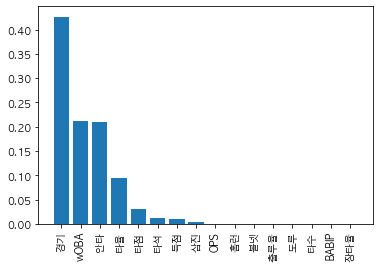

In [17]:
imp_df = pd.DataFrame({'var': input_var,
                      'imp': xgb.feature_importances_})

imp_df

imp_df = imp_df.sort_values(['imp'], ascending = False)

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation = 90) #가로축 변수 회전

In [18]:
input_var1 = ['경기','타점', '안타','타율', 'wOBA']

In [19]:
xgb.fit(train_12[input_var1], train_12['WAR'])

test_12['WAR_N'] = xgb.predict(test_12[input_var1])

test_12

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_N
0,최정,SK,130.0,553.0,474.0,142.0,26.0,85.0,84.0,49.0,98.0,20.0,0.326,0.300,0.385,0.538,0.923,0.410,6.22,6.185196
1,정근우,SK,127.0,534.0,467.0,124.0,8.0,53.0,46.0,47.0,33.0,22.0,0.271,0.266,0.339,0.362,0.701,0.328,2.09,2.088415
2,이호준,SK,127.0,504.0,426.0,128.0,18.0,55.0,78.0,72.0,90.0,3.0,0.345,0.300,0.407,0.488,0.895,0.408,3.88,3.871625
3,김강민,SK,123.0,474.0,427.0,116.0,5.0,49.0,31.0,29.0,72.0,11.0,0.314,0.272,0.322,0.354,0.676,0.314,1.16,1.159196
4,박정권,SK,122.0,472.0,416.0,106.0,12.0,61.0,61.0,43.0,80.0,4.0,0.287,0.255,0.328,0.389,0.717,0.331,0.75,0.749915
5,임훈,SK,117.0,348.0,314.0,84.0,0.0,36.0,26.0,18.0,56.0,3.0,0.324,0.268,0.308,0.318,0.626,0.293,-0.34,-0.338606
6,박재상,SK,100.0,322.0,269.0,58.0,4.0,37.0,23.0,34.0,60.0,6.0,0.261,0.216,0.304,0.305,0.609,0.292,-0.46,-0.455142
7,조인성,SK,104.0,307.0,284.0,77.0,9.0,32.0,40.0,16.0,60.0,0.0,0.313,0.271,0.313,0.412,0.725,0.328,1.68,1.674366
8,안치용,SK,92.0,232.0,198.0,44.0,6.0,23.0,23.0,31.0,66.0,4.0,0.302,0.222,0.330,0.374,0.704,0.333,0.70,0.699992
9,최윤석,SK,109.0,213.0,170.0,39.0,1.0,17.0,15.0,33.0,36.0,6.0,0.284,0.229,0.359,0.253,0.612,0.312,0.73,0.728974


In [20]:
(test_12['WAR_N'] / test_12['WAR']).mean()

0.9980795833220111

모든 변수를 포함하여 예측했을 때 보다 약간이지만 정확도가 더 높아졌다는 것을 알 수 있다.

100
200
300
400
500
600
700
800
900


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

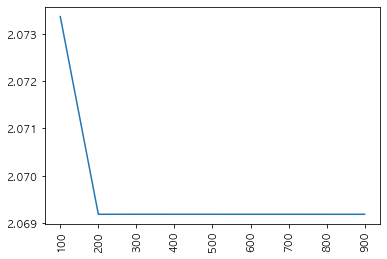

In [123]:
estim_list = [100,200,300,400,500,600,700,800,900]
score_list = []

train_12 = train_12.dropna()

from sklearn.model_selection import cross_val_score

for i in estim_list:
    xgb = XGBRegressor(n_estimators = i, learning_rate = 0.1, random_state=2021)
    scores = cross_val_score(xgb, train_12[input_var1], train_12['WAR'], scoring='neg_mean_squared_error',cv=3)
    score_list.append(-np.mean(scores))
    print(i)

plt.plot(estim_list, score_list)
plt.xticks(rotation=90)



파라미터는 100이 제일 좋고, 그 이상은 다 비슷하다.

## 4. 최근 4년간 100타석 이상 소화한 선수 기준으로 2021 성적 예측해보기

In [24]:
sk_17['선수명']

0      최정
1     나주환
2     김성현
3     김동엽
4      로맥
5     한동민
6     노수광
7     정의윤
8     이재원
9     박정권
10    조용호
11    정진기
12    김강민
13    박승욱
14    이성우
15    이대수
16     최항
17    이홍구
Name: 선수명, dtype: object

In [55]:
sk_18['선수명']

61     로맥
62    노수광
63    한동민
64     최정
65    이재원
66    김성현
67    김동엽
68    나주환
69    김강민
70     최항
71    정의윤
72    정진기
73    이성우
74    강승호
Name: 선수명, dtype: object

In [32]:
sk_19['선수명']

0      최정
1      로맥
2     고종욱
3     이재원
4     한동민
5     김성현
6     김강민
7     노수광
8     정의윤
9     나주환
10     최항
11    안상현
Name: 선수명, dtype: object

In [69]:
sk_20['선수명']

0      로맥
1      최정
2     최지훈
3     김성현
4     김강민
5     고종욱
6     이재원
7     한동민
8     최준우
9     오태곤
10    정의윤
11    채태인
12    오준혁
13     최항
14    정진기
15    이흥련
16     정현
17    박성한
18    김경호
19    이현석
Name: 선수명, dtype: object

<strong>선수 이름만 리스트로 만들어준다음, 한 리스트에 모두 몰아 4번 중복되어 나오는 선수가 4년동안 꾸준히 100타석 이상 소화한 선수라는 것을 알 수 있다.</strong>

In [73]:
import numpy as np

raw1 = np.array(sk_20['선수명'].tolist())
raw2 = np.array(sk_19['선수명'].tolist())
raw3 = np.array(sk_18['선수명'].tolist())
raw4 = np.array(sk_17['선수명'].tolist())

In [80]:
raw = []
raw.extend(raw1)
raw.extend(raw2)
raw.extend(raw3)
raw.extend(raw4)

raw

['로맥',
 '최정',
 '최지훈',
 '김성현',
 '김강민',
 '고종욱',
 '이재원',
 '한동민',
 '최준우',
 '오태곤',
 '정의윤',
 '채태인',
 '오준혁',
 '최항',
 '정진기',
 '이흥련',
 '정현',
 '박성한',
 '김경호',
 '이현석',
 '최정',
 '로맥',
 '고종욱',
 '이재원',
 '한동민',
 '김성현',
 '김강민',
 '노수광',
 '정의윤',
 '나주환',
 '최항',
 '안상현',
 '로맥',
 '노수광',
 '한동민',
 '최정',
 '이재원',
 '김성현',
 '김동엽',
 '나주환',
 '김강민',
 '최항',
 '정의윤',
 '정진기',
 '이성우',
 '강승호',
 '최정',
 '나주환',
 '김성현',
 '김동엽',
 '로맥',
 '한동민',
 '노수광',
 '정의윤',
 '이재원',
 '박정권',
 '조용호',
 '정진기',
 '김강민',
 '박승욱',
 '이성우',
 '이대수',
 '최항',
 '이홍구']

In [120]:
#중복데이터 찾는 반복문
word_cnt = dict() 

for word in raw: 
    if word not in word_cnt.keys(): 
        word_cnt[word] = 1 
    else: 
        word_cnt[word] += 1
print(word_cnt)

{'로맥': 4, '최정': 4, '최지훈': 1, '김성현': 4, '김강민': 4, '고종욱': 2, '이재원': 4, '한동민': 4, '최준우': 1, '오태곤': 1, '정의윤': 4, '채태인': 1, '오준혁': 1, '최항': 4, '정진기': 3, '이흥련': 1, '정현': 1, '박성한': 1, '김경호': 1, '이현석': 1, '노수광': 3, '나주환': 3, '안상현': 1, '김동엽': 2, '이성우': 2, '강승호': 1, '박정권': 1, '조용호': 1, '박승욱': 1, '이대수': 1, '이홍구': 1}


<strong>4년 연속 100타석 이상 소화한 선수 : 로맥, 최정, 김성현, 김강민, 이재원, 한동민, 정의윤, 최항.</strong>

In [84]:
player = ['로맥', '최정', '김성현', '김강민', '이재원', '한동민', '정의윤', '최항']

## 5. train, test 데이터 나누어 21시즌 WAR 예측해보기
1. train 데이터에 2017~2019 3시즌만 포함하고, test 데이터는 2020 시즌 기록만 포함
2. train 데이터에 2017~2020 4시즌 모두 포함하고, test 데이터는 2020 시즌 기록만 포함

In [126]:
#선수별로 데이터 만들기, 첫번째로 train 데이터에 19시즌 까지만 포함하도록
rm_train = pd.concat([sk_17[sk_17['선수명'] == '로맥'], sk_18[sk_18['선수명'] == '로맥'],sk_19[sk_19['선수명'] == '로맥']])
rm_test = sk_20[sk_20['선수명'] == '로맥']

In [127]:
rm_train
rm_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,로맥,SK,139,586,485,137,32,85,91,91,116,4,0.308,0.282,0.399,0.546,0.945,0.407,4.94


In [128]:
cj_train = pd.concat([sk_17[sk_17['선수명'] == '최정'], sk_18[sk_18['선수명'] == '최정'],sk_19[sk_19['선수명'] == '최정']])
cj_test = sk_20[sk_20['선수명'] == '최정']

ksh_train = pd.concat([sk_17[sk_17['선수명'] == '김성현'], sk_18[sk_18['선수명'] == '김성현'],sk_19[sk_19['선수명'] == '김성현']])
ksh_test = sk_20[sk_20['선수명'] == '김성현']

kkm_train = pd.concat([sk_17[sk_17['선수명'] == '김강민'], sk_18[sk_18['선수명'] == '김강민'],sk_19[sk_19['선수명'] == '김강민']])
kkm_test = sk_20[sk_20['선수명'] == '김강민']

ljw_train = pd.concat([sk_17[sk_17['선수명'] == '이재원'], sk_18[sk_18['선수명'] == '이재원'],sk_19[sk_19['선수명'] == '이재원']])
ljw_test = sk_20[sk_20['선수명'] == '이재원']

hdm_train = pd.concat([sk_17[sk_17['선수명'] == '한동민'], sk_18[sk_18['선수명'] == '한동민'],sk_19[sk_19['선수명'] == '한동민']])
hdm_test = sk_20[sk_20['선수명'] == '한동민']

jey_train = pd.concat([sk_17[sk_17['선수명'] == '정의윤'], sk_18[sk_18['선수명'] == '정의윤'],sk_19[sk_19['선수명'] == '정의윤']])
jey_test = sk_20[sk_20['선수명'] == '정의윤']

ch_train = pd.concat([sk_17[sk_17['선수명'] == '최항'], sk_18[sk_18['선수명'] == '최항'],sk_19[sk_19['선수명'] == '최항']])
ch_test = sk_20[sk_20['선수명'] == '최항']



In [129]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 2021)


xgb.fit(rm_train[input_var1], rm_train['WAR'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2021,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
rm_test['WAR_21'] = xgb.predict(rm_test[input_var1])

In [131]:
rm_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
0,로맥,SK,139,586,485,137,32,85,91,91,116,4,0.308,0.282,0.399,0.546,0.945,0.407,4.94,5.728512


In [132]:
xgb.fit(cj_train[input_var1], cj_train['WAR'])
cj_test['WAR_21'] = xgb.predict(cj_test[input_var1])

xgb.fit(ksh_train[input_var1], ksh_train['WAR'])
ksh_test['WAR_21'] = xgb.predict(ksh_test[input_var1])

xgb.fit(kkm_train[input_var1], kkm_train['WAR'])
kkm_test['WAR_21'] = xgb.predict(kkm_test[input_var1])

xgb.fit(ljw_train[input_var1], ljw_train['WAR'])
ljw_test['WAR_21'] = xgb.predict(ljw_test[input_var1])

xgb.fit(hdm_train[input_var1], hdm_train['WAR'])
hdm_test['WAR_21'] = xgb.predict(hdm_test[input_var1])

xgb.fit(jey_train[input_var1], jey_train['WAR'])
jey_test['WAR_21'] = xgb.predict(jey_test[input_var1])

xgb.fit(ch_train[input_var1], ch_train['WAR'])
ch_test['WAR_21'] = xgb.predict(ch_test[input_var1])

In [133]:
#경고문 무시 함수
import warnings

warnings.filterwarnings(action='ignore')

In [134]:
cj_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
1,최정,SK,133,553,452,122,33,90,96,75,98,8,0.272,0.27,0.392,0.538,0.93,0.403,5.57,6.621199


In [135]:
ksh_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
3,김성현,SK,133,392,343,93,2,34,25,30,27,1,0.287,0.271,0.336,0.321,0.657,0.306,0.49,0.230485


In [136]:
kkm_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
4,김강민,SK,122,327,289,73,12,39,45,27,62,7,0.281,0.253,0.323,0.422,0.745,0.327,0.62,1.028099


In [137]:
ljw_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
6,이재원,SK,80,251,222,41,2,18,21,19,24,0,0.198,0.185,0.266,0.248,0.514,0.24,-1.12,0.042723


In [138]:
hdm_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
7,한동민,SK,62,231,193,48,15,35,31,30,49,2,0.252,0.249,0.364,0.508,0.872,0.376,1.4,2.306736


In [139]:
jey_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
10,정의윤,SK,76,203,187,45,1,13,20,12,38,0,0.291,0.241,0.286,0.294,0.58,0.264,-1.27,0.181895


In [140]:
ch_test

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
13,최항,SK,47,155,132,35,2,21,15,21,27,1,0.317,0.265,0.368,0.333,0.701,0.328,0.46,0.003151


In [141]:
#선수별로 예측 확인했으면 하나의 데이터로 묶어주기
sk_21_p = pd.concat([rm_test,cj_test,ksh_test,kkm_test,ljw_test,hdm_test,jey_test,ch_test])

In [142]:
sk_21_p

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
0,로맥,SK,139,586,485,137,32,85,91,91,116,4,0.308,0.282,0.399,0.546,0.945,0.407,4.94,5.728512
1,최정,SK,133,553,452,122,33,90,96,75,98,8,0.272,0.270,0.392,0.538,0.930,0.403,5.57,6.621199
3,김성현,SK,133,392,343,93,2,34,25,30,27,1,0.287,0.271,0.336,0.321,0.657,0.306,0.49,0.230485
4,김강민,SK,122,327,289,73,12,39,45,27,62,7,0.281,0.253,0.323,0.422,0.745,0.327,0.62,1.028099
6,이재원,SK,80,251,222,41,2,18,21,19,24,0,0.198,0.185,0.266,0.248,0.514,0.240,-1.12,0.042723
7,한동민,SK,62,231,193,48,15,35,31,30,49,2,0.252,0.249,0.364,0.508,0.872,0.376,1.40,2.306736
10,정의윤,SK,76,203,187,45,1,13,20,12,38,0,0.291,0.241,0.286,0.294,0.580,0.264,-1.27,0.181895
13,최항,SK,47,155,132,35,2,21,15,21,27,1,0.317,0.265,0.368,0.333,0.701,0.328,0.46,0.003151


In [113]:
#이번엔 train 데이터에 20년까지 포함하도록

In [143]:
rm_train = pd.concat([sk_17[sk_17['선수명'] == '로맥'], sk_18[sk_18['선수명'] == '로맥'],sk_19[sk_19['선수명'] == '로맥'],sk_20[sk_20['선수명'] == '로맥']])

cj_train = pd.concat([sk_17[sk_17['선수명'] == '최정'], sk_18[sk_18['선수명'] == '최정'],sk_19[sk_19['선수명'] == '최정'],sk_20[sk_20['선수명'] == '최정']])

ksh_train = pd.concat([sk_17[sk_17['선수명'] == '김성현'], sk_18[sk_18['선수명'] == '김성현'],sk_19[sk_19['선수명'] == '김성현'],sk_20[sk_20['선수명'] == '김성현']])

kkm_train = pd.concat([sk_17[sk_17['선수명'] == '김강민'], sk_18[sk_18['선수명'] == '김강민'],sk_19[sk_19['선수명'] == '김강민'],sk_20[sk_20['선수명'] == '김강민']])

ljw_train = pd.concat([sk_17[sk_17['선수명'] == '이재원'], sk_18[sk_18['선수명'] == '이재원'],sk_19[sk_19['선수명'] == '이재원'],sk_20[sk_20['선수명'] == '이재원']])

hdm_train = pd.concat([sk_17[sk_17['선수명'] == '한동민'], sk_18[sk_18['선수명'] == '한동민'],sk_19[sk_19['선수명'] == '한동민'],sk_20[sk_20['선수명'] == '한동민']])

jey_train = pd.concat([sk_17[sk_17['선수명'] == '정의윤'], sk_18[sk_18['선수명'] == '정의윤'],sk_19[sk_19['선수명'] == '정의윤'],sk_20[sk_20['선수명'] == '정의윤']])

ch_train = pd.concat([sk_17[sk_17['선수명'] == '최항'], sk_18[sk_18['선수명'] == '최항'],sk_19[sk_19['선수명'] == '최항'],sk_20[sk_20['선수명'] == '최항']])


In [144]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 2021)


xgb.fit(rm_train[input_var1], rm_train['WAR'])
rm_test['WAR_21'] = xgb.predict(rm_test[input_var1])

xgb.fit(cj_train[input_var1], cj_train['WAR'])
cj_test['WAR_21'] = xgb.predict(cj_test[input_var1])

xgb.fit(ksh_train[input_var1], ksh_train['WAR'])
ksh_test['WAR_21'] = xgb.predict(ksh_test[input_var1])

xgb.fit(kkm_train[input_var1], kkm_train['WAR'])
kkm_test['WAR_21'] = xgb.predict(kkm_test[input_var1])

xgb.fit(ljw_train[input_var1], ljw_train['WAR'])
ljw_test['WAR_21'] = xgb.predict(ljw_test[input_var1])

xgb.fit(hdm_train[input_var1], hdm_train['WAR'])
hdm_test['WAR_21'] = xgb.predict(hdm_test[input_var1])

xgb.fit(jey_train[input_var1], jey_train['WAR'])
jey_test['WAR_21'] = xgb.predict(jey_test[input_var1])

xgb.fit(ch_train[input_var1], ch_train['WAR'])
ch_test['WAR_21'] = xgb.predict(ch_test[input_var1])

In [145]:
sk_21_p1 = pd.concat([rm_test,cj_test,ksh_test,kkm_test,ljw_test,hdm_test,jey_test,ch_test])

In [146]:
sk_21_p1

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,WAR_21
0,로맥,SK,139,586,485,137,32,85,91,91,116,4,0.308,0.282,0.399,0.546,0.945,0.407,4.94,4.932702
1,최정,SK,133,553,452,122,33,90,96,75,98,8,0.272,0.270,0.392,0.538,0.930,0.403,5.57,5.567742
3,김성현,SK,133,392,343,93,2,34,25,30,27,1,0.287,0.271,0.336,0.321,0.657,0.306,0.49,0.489356
4,김강민,SK,122,327,289,73,12,39,45,27,62,7,0.281,0.253,0.323,0.422,0.745,0.327,0.62,0.619752
6,이재원,SK,80,251,222,41,2,18,21,19,24,0,0.198,0.185,0.266,0.248,0.514,0.240,-1.12,-1.110252
7,한동민,SK,62,231,193,48,15,35,31,30,49,2,0.252,0.249,0.364,0.508,0.872,0.376,1.40,1.399776
10,정의윤,SK,76,203,187,45,1,13,20,12,38,0,0.291,0.241,0.286,0.294,0.580,0.264,-1.27,-1.259520
13,최항,SK,47,155,132,35,2,21,15,21,27,1,0.317,0.265,0.368,0.333,0.701,0.328,0.46,0.459508


<strong>train 데이터에 20년도 기록까지 포함하여 예측하면 20년도와 거의 비슷한 결과값이 나와 21년도 기록 예측이라고 보기 어렵다. 
<br>따라서 19년도 기록까지만 포함한 데이터로 예측한 값이 더 합리적이라고 볼 수 있다.</strong>